# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading csv file and basic preprocessing

In [2]:
df = pd.read_csv("./diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Seperating Variables: Dependent and Independent Variables

In [10]:
X = df.drop(['Outcome'],axis = 1)
Y = df['Outcome']

(768, 8)

# Scaling Data using Minmax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [14]:
#MinmaxScaler.fit() will return a an array which needs to be converted into pandas Dataframe
X = pd.DataFrame(x_scaled,columns = X.columns)

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Seperating dataset into Train-Test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 56,stratify =  Y)

In [18]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
496,0.294118,0.552764,0.557377,0.000000,0.000000,0.387481,0.091375,0.150000
130,0.235294,0.869347,0.573770,0.141414,0.198582,0.442623,0.120837,0.200000
586,0.470588,0.718593,0.540984,0.000000,0.000000,0.520119,0.021776,0.333333
128,0.058824,0.587940,0.721311,0.242424,0.171395,0.514158,0.138770,0.316667
119,0.235294,0.497487,0.622951,0.151515,0.060284,0.345753,0.061913,0.000000


In [19]:
Y_train.head()

496    0
130    1
586    1
128    1
119    0
Name: Outcome, dtype: int64

# Importing KNN Classifiers

In [20]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [28]:
# Creating instance of KNN with default no. of neighbous
knn = KNN(n_neighbors= 5 )
knn.fit(X_train,Y_train)
Pred = knn.predict(X_test)
F1 = f1_score(Pred,Y_test)
print("F1 score is:",F1)

F1 score is: 0.528


# Defining Elbow for Classifier

In [30]:
def Elbow(k):
    temp_error = []
    for i in k:
        clf = KNN(n_neighbors=i)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)
        F1 = f1_score(pred,Y_test)
        error = 1 - F1
        temp_error.append(error)
    return temp_error        

In [45]:
k  = range(15,25)
elbow = Elbow(k)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow curve')

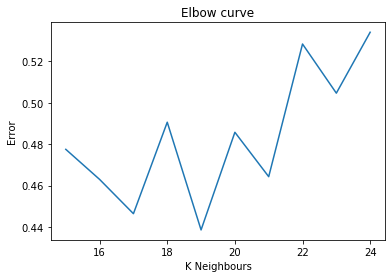

In [46]:
# need some fixing plot all fucked up
plt.plot(k,elbow)
plt.xlabel("K Neighbours")
plt.ylabel("Error")
plt.title("Elbow curve")

In [49]:
# Creating Knn for least error value
knn = KNN(n_neighbors= 19 )
knn.fit(X_train,Y_train)
Pred = knn.predict(X_test)
F1 = f1_score(Pred,Y_test)
print("F1 score is:",F1)

F1 score is: 0.5614035087719299
